In [55]:
root_dir = 'C:\\Users\\jhobaek\\Downloads\\OneDrive-2023-08-26\\CYH 13\\BottomSideWall'

In [4]:
import os
import shutil

if not os.path.exists(os.path.join(root_dir, '\\test')):    
    os.mkdir(os.path.join(root_dir, '\\test'))

if not os.path.exists(os.path.join(root_dir, '\\test_image_files')):    
    os.mkdir(os.path.join(root_dir, '\\test_image_files'))

In [6]:
# 데이터 전체 개수 확인

import os
import glob

label_name_list = os.listdir(os.path.join(root_dir, 'C:\\Users\\jhobaek\\Downloads\\OneDrive-2023-08-26\\CYH 13\\BottomSideWall'))

print('total label nums = ', len(label_name_list))
print('=================================================')
print(label_name_list)

total label nums =  2
['FailImage', 'PassImage']


In [8]:
import os
import glob
import shutil

ratio = 0.1    # train : test = 90 : 10

src_root_dir = os.path.join(root_dir, 'C:/Users/jhobaek/Downloads/OneDrive-2023-08-26/CYH 13/BottomSideWall/train')
dst_root_dir = os.path.join(root_dir, 'C:/Users/jhobaek/Downloads/OneDrive-2023-08-26/CYH 13/BottomSideWall/test')

label_name_list = os.listdir(src_root_dir) 

for label_name in label_name_list:   # test 디렉토리에 label 디렉토리 생성
    dst_label_name_dir = os.path.join(dst_root_dir, label_name)

    if not os.path.exists(dst_label_name_dir):
        os.mkdir(dst_label_name_dir)

#for label_name in label_name_list:    # 파일 move src dir => dst dir
#    train_image_file_list = glob.glob(os.path.join(src_root_dir, label_name, '*'))
#    split_num = int(ratio * len(train_image_file_list))
#    test_image_file_list = train_image_file_list[0:split_num]

#    for image_file in test_image_file_list:
#        shutil.move(image_file, os.path.join(dst_root_dir, label_name))    # move

In [9]:
# train : test 데이터 비율 확인

src_root_dir = os.path.join(root_dir, 'C:/Users/jhobaek/Downloads/OneDrive-2023-08-26/CYH 13/BottomSideWall/train')
dst_root_dir = os.path.join(root_dir, 'C:/Users/jhobaek/Downloads/OneDrive-2023-08-26/CYH 13/BottomSideWall/test')

train_label_name_list = os.listdir(src_root_dir)
test_label_name_list = os.listdir(dst_root_dir)

train_label_name_list.sort()
test_label_name_list.sort()

if train_label_name_list != test_label_name_list:
    print('fatal error !!!!')
else:
    print(len(train_label_name_list), len(test_label_name_list))

# 데이터 개수 확인

for label_name in train_label_name_list:

    train_data_nums = len(os.listdir(os.path.join(src_root_dir, label_name)))
    test_data_nums = len(os.listdir(os.path.join(dst_root_dir, label_name)))

    print('train => ', label_name, train_data_nums, ' , test => ', label_name, test_data_nums)
    print('=======================================================')

2 2
train =>  FailImage 487  , test =>  FailImage 54
train =>  PassImage 324  , test =>  PassImage 36


In [10]:
import os
import glob
import shutil

src_root_dir = os.path.join(root_dir, 'C:/Users/jhobaek/Downloads/OneDrive-2023-08-26/CYH 13/BottomSideWall/train')
dst_root_dir = os.path.join(root_dir, 'C:/Users/jhobaek/Downloads/OneDrive-2023-08-26/CYH 13/BottomSideWall/test')

# 대상 디렉토리가 없다면 생성합니다.
if not os.path.exists(dst_root_dir):
    os.makedirs(dst_root_dir)

label_name_list = os.listdir(src_root_dir)

for label_name in label_name_list:  # 파일 copy src dir => dst dir
    image_file_list = glob.glob(os.path.join(src_root_dir, label_name, '*'))
    print('total [%s] image file nums => [%s]' % (label_name, len(image_file_list)))

    copy_nums = 0

    for image_file in image_file_list:
        shutil.copy(image_file, os.path.join(dst_root_dir, os.path.basename(image_file)))  # copy 
        copy_nums = copy_nums + 1

    print('total copy nums => ', copy_nums)

total [FailImage] image file nums => [487]
total copy nums =>  487
total [PassImage] image file nums => [324]
total copy nums =>  324


In [22]:
IMG_WIDTH = 224  
IMG_HEIGHT = 224  


train_dir = os.path.join(root_dir, 'C:/Users/jhobaek/Downloads/OneDrive-2023-08-26/CYH 13/BottomSideWall/train')
validation_dir = os.path.join(root_dir, 'C:/Users/jhobaek/Downloads/OneDrive-2023-08-26/CYH 13/BottomSideWall/train')
test_dir = os.path.join(root_dir, 'C:/Users/jhobaek/Downloads/OneDrive-2023-08-26/CYH 13/BottomSideWall/test')


In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator 인스턴스 생성
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2, 
                                    height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
                                    validation_split=0.15)

validation_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15)


In [35]:
train_generator = train_datagen.flow_from_directory(train_dir, batch_size=16, color_mode='rgb', 
                                                class_mode='sparse', subset = 'training',
                                                target_size=(IMG_WIDTH,IMG_HEIGHT))

validation_generator = validation_datagen.flow_from_directory(validation_dir, batch_size=16, color_mode='rgb', 
                                                          class_mode='sparse', subset = 'validation',
                                                          target_size=(IMG_WIDTH,IMG_HEIGHT))

Found 690 images belonging to 2 classes.
Found 121 images belonging to 2 classes.


In [36]:
print(train_generator.class_indices)

{'FailImage': 0, 'PassImage': 1}


In [34]:
import tensorflow as tf 
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
import scipy

In [37]:
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(IMG_WIDTH,IMG_HEIGHT,3))

# MobileNet 모델을 가져옵니다.
# weights='imagenet'는 ImageNet 데이터셋으로 사전 학습된 가중치를 사용하겠다는 의미입니다. imagenet을 가중치로 사용 가능한 모델 참조. https://keras.io/ko/applications/
# include_top=False는 모델의 최상위 레이어를 포함하지 않겠다는 의미로, 이는 마지막 분류 레이어를 제외하고 가져오라는 뜻입니다.
# input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)는 입력 이미지의 크기를 지정합니다. RGB 이미지이므로 채널 수는 3입니다.


In [40]:
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(IMG_WIDTH,IMG_HEIGHT,3))

In [41]:
model = Sequential() # 새로운 신경망 모델을 생성합니다. 이 모델은 순차적으로 레이어를 추가하는 방식으로 구성됩니다

model.add(base_model) # 기본 모델인 base_model을 모델에 추가합니다. 이는 전환 학습에서 기본 모델의 특징 추출 능력을 활용하려는 의도입니다.

model.add(Flatten()) #base_model에서 나온 다차원 텐서를 1차원으로 평탄화합니다. 이는 다음 레이어에서 완전 연결 레이어를 사용하기 위한 준비 단계입니다.
model.add(Dense(32, activation='relu')) # 32개의 뉴런을 가진 완전 연결 레이어를 추가합니다. 활성화 함수로는 ReLU(Rectified Linear Unit) 함수를 사용합니다. 이 레이어는 비선형성을 추가하여 모델이 더 복잡한 패턴을 학습할 수 있도록 도와줍니다
model.add(Dropout(0.25)) #드롭아웃(Dropout) 레이어를 추가합니다. 드롭아웃은 과적합을 줄이기 위한 방법으로, 학습 시에 일부 뉴런을 임시로 끄는 것을 의미합니다. 여기서는 25%의 확률로 뉴런을 비활성화시킵니다.                 
model.add(Dense(4, activation='softmax')) #최종 출력 레이어를 추가합니다. 이 레이어는 클래스 수와 같은 뉴런 수를 가집니다. 활성화 함수로는 소프트맥스(Softmax) 함수를 사용하여 각 클래스에 대한 확률 분포를 얻습니다.

In [42]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(2e-5), metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 50176)             0         
                                                                 
 dense_4 (Dense)             (None, 32)                1605664   
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 4)                 132       
                                                                 
Total params: 4,834,660
Trainable params: 4,812,772
Non-trainable params: 21,888
_______________________________________

In [43]:
import scipy  # 올바른 대소문자로 임포트

from tensorflow.keras.callbacks import EarlyStopping

earlystopping = EarlyStopping(monitor='val_loss', patience=5)                     

hist = model.fit(train_generator, validation_data=validation_generator,
                 epochs=20, callbacks=[earlystopping])

Epoch 1/20
44/44 [==============================] - 102s 2s/step - loss: 1.0374 - accuracy: 0.5739 - val_loss: 0.6698 - val_accuracy: 0.5785
Epoch 2/20
44/44 [==============================] - 90s 2s/step - loss: 0.7080 - accuracy: 0.6275 - val_loss: 0.5753 - val_accuracy: 0.6942
Epoch 3/20
44/44 [==============================] - 92s 2s/step - loss: 0.6417 - accuracy: 0.6652 - val_loss: 0.5913 - val_accuracy: 0.7190
Epoch 4/20
44/44 [==============================] - 93s 2s/step - loss: 0.5915 - accuracy: 0.6957 - val_loss: 0.5462 - val_accuracy: 0.7273
Epoch 5/20
44/44 [==============================] - 94s 2s/step - loss: 0.5679 - accuracy: 0.6928 - val_loss: 0.5352 - val_accuracy: 0.6694
Epoch 6/20
44/44 [==============================] - 93s 2s/step - loss: 0.5266 - accuracy: 0.7464 - val_loss: 0.5546 - val_accuracy: 0.6777
Epoch 7/20
44/44 [==============================] - 95s 2s/step - loss: 0.5252 - accuracy: 0.7377 - val_loss: 0.5433 - val_accuracy: 0.6529
Epoch 8/20
44/44 [=

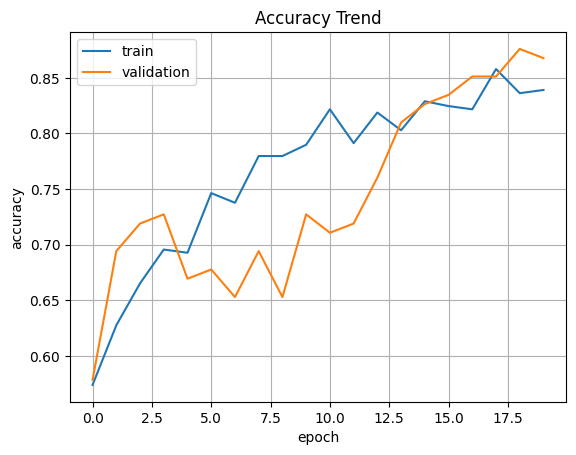

In [44]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='validation')
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

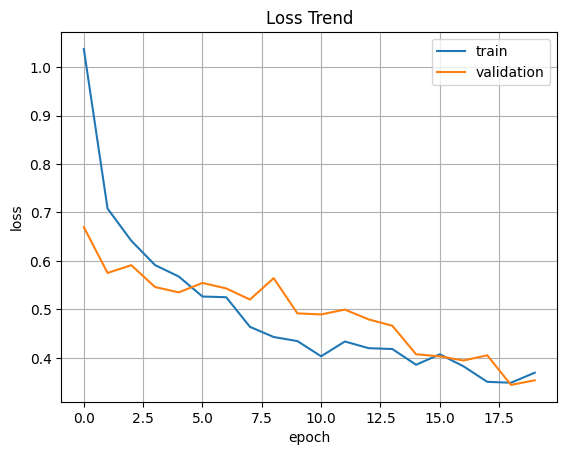

In [45]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

In [46]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [47]:
test_generator = test_datagen.flow_from_directory(test_dir, batch_size=32, color_mode='rgb',
                                              class_mode='sparse', target_size=(IMG_WIDTH,IMG_HEIGHT))

Found 90 images belonging to 2 classes.


In [48]:
model.evaluate(test_generator)

3/3 [==============================] - 3s 974ms/step - loss: 0.1952 - accuracy: 0.9556


[0.19517114758491516, 0.9555555582046509]

In [61]:
import random
import os
import numpy as np
import cv2
import glob

root_dir = 'C:/Users/jhobaek/Downloads/OneDrive-2023-08-26/CYH 13/BottomSideWall'

label_dict = {'FailImage': 0, 'PassImage': 1}

test_image_files_list = glob.glob(root_dir + '/test/*.jpg')

random.shuffle(test_image_files_list)

test_num = 16
test_image_files = test_image_files_list[:test_num]  # 태스트 파일이름은 정답.숫자.jpg 

label_list = []

for i in range(len(test_image_files)):
    label = os.path.basename(test_image_files[i]).split('.')[0].strip()
    if label in label_dict:
        label_list.append(label_dict[label])
    else:
        print(f"Label for file {test_image_files[i]} not found in label_dict")

src_img_list = []

for i in range(len(test_image_files)):
    src_img = cv2.imread(test_image_files[i], cv2.IMREAD_COLOR)
    src_img = cv2.resize(src_img, dsize=(IMG_WIDTH, IMG_HEIGHT))
    src_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)
    src_img = src_img / 255.0

    src_img_list.append(src_img)

# 4차원 텐서  변환
src_img_array = np.array(src_img_list)
label_array = np.array(label_list)

print(src_img_array.shape, label_array.shape)
print(label_array)

Label for file C:/Users/jhobaek/Downloads/OneDrive-2023-08-26/CYH 13/BottomSideWall/test\P C248PH4-13D3 X011Y005_5SB.jpg not found in label_dict
Label for file C:/Users/jhobaek/Downloads/OneDrive-2023-08-26/CYH 13/BottomSideWall/test\P C248PH4-12E0 X013Y025_5SB.jpg not found in label_dict
Label for file C:/Users/jhobaek/Downloads/OneDrive-2023-08-26/CYH 13/BottomSideWall/test\P C248PH4-12E0 X015Y021_5SB.jpg not found in label_dict
Label for file C:/Users/jhobaek/Downloads/OneDrive-2023-08-26/CYH 13/BottomSideWall/test\P C248PH4-13D3 X007Y006_5SB.jpg not found in label_dict
Label for file C:/Users/jhobaek/Downloads/OneDrive-2023-08-26/CYH 13/BottomSideWall/test\P C248PH4-13D3 X006Y017_5SB.jpg not found in label_dict
Label for file C:/Users/jhobaek/Downloads/OneDrive-2023-08-26/CYH 13/BottomSideWall/test\P C248PH4-13D3 X005Y028_5SB.jpg not found in label_dict
Label for file C:/Users/jhobaek/Downloads/OneDrive-2023-08-26/CYH 13/BottomSideWall/test\P C248PH4-13D3 X009Y011_5SB.jpg not found

In [58]:
pred = model.predict(src_img_array)
print(pred.shape)

1/1 [==============================] - 2s 2s/step
(16, 4)


IndexError: index 0 is out of bounds for axis 0 with size 0

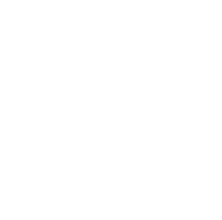

In [59]:
import matplotlib.pyplot as plt

class_names = ['FailImage', 'PassImage']

plt.figure(figsize=(12,12))

for pos in range(len(pred)):

    plt.subplot(4,4,pos+1)
    plt.axis('off')

    label_str = class_names[label_array[pos]]
    pred_str = class_names[np.argmax(pred[pos])]

    plt.title('label:' + label_str + '\npred:' + pred_str)

    plt.imshow(src_img_array[pos])

plt.tight_layout()
plt.show()